## Extra advanced material and exercises

To be added

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage
%matplotlib widget

# 3-D images and videos

The main material for our course deals with 2 dimensional images. However images can be three dimensional, for example a CT or MRI of the human brain. Images can even be four dimensional, for example a moving real-time image of a fetus through ultrasound. Check out this lovely image as an example: https://en.wikipedia.org/wiki/File:Fetal_yawning_4D_ultrasound_ecografia_4D_Dr._Wolfgang_Moroder.theora.ogv

How do we understand images that are more than just a plane? Conceputally we could think of 3-D images as a sequence of multiple 2D images stacked on each other. But this idea takes away the critical fact that we are dealing with something made of small cubes instead of pixels (small squares). We now are dealing in voxels. As pixels were to 2D images, voxels are to 3D images. Voxels is a concatenation from volume and element. 

We can use skimage to work with voxels just as we use it to work with pixels. In fact there are even instructions in the documentation:

https://scikit-image.org/skimage-tutorials/lectures/three_dimensional_image_processing.html

Read the documentation, but note you do not have all the libraries available to run the code snippets.

Advanced exercise #1 : Create your own 3D image! (hint: images are arrays)

The awnsers are in the lower cell blocks

# Segmentations
## Watershedding is a type of segmentation algorithm

Segmentation is seperating different objects inside an image. For example if we have a body CT , and we want to build an algorithm that looks at only the bony structures we may want to perform a segmentation  to segment only the bones. In this case you might guess the idea behind segmentation could very simple, as the bones will be of very different pixel intensity values than surrounding tissue. But in other cases things may not be so simple. There are many different algorithms used for segmentation. This course will touch on the edge of a few, but one that is popular, and not covered is watershedding.

Read the documentation for watershedding in skimage here: 
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_watershed.html

Exercise: make an image with two rectangles that overlap, then use watershedding to create a seperate object picture.

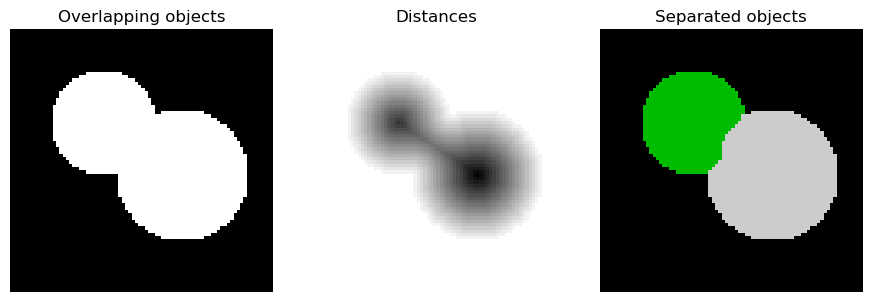

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

Template matching?

Edge detection?

Advanced exercise #1 : Create your own 3D image!
PossibleAwnser:

In [15]:
array_example = np.array([[[0, 1, 2, 3],

                           [4, 5, 6, 155],
                          [0,0,0]],


                          [[0, 1, 2, 3],

                           [4, 5, 6, 70],
                          [4, 5, 6, 70]],


                          [[0 ,1 ,2, 30],

                           [4, 5, 6, 7],
                          [4, 5, 6, 7]]])

C:\Users\CandaceMoore\AppData\Local\Temp\ipykernel_12384\2259794682.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array_example = np.array([[[0, 1, 2, 3],


In [8]:
array_example

array([[[  0,   1,   2,   3],
        [  4,   5,   6, 155]],

       [[  0,   1,   2,   3],
        [  4,   5,   6,  70]],

       [[  0,   1,   2,  30],
        [  4,   5,   6,   7]]])

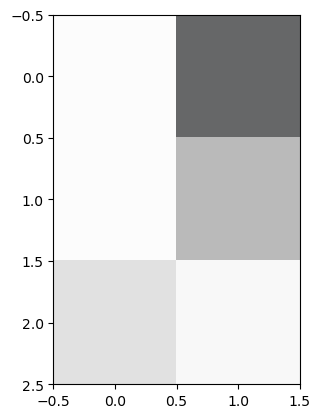

In [9]:

plt.figure()
plt.imshow(array_example, cmap='gray')
#plt.axis('off')
plt.show()

In [21]:
ara = np.array([[[1., 50., 255., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 10., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 20., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 40., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [23]:
def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = ara

In [24]:
filled

array([[[  1.,  50., 255.,   1.],
        [  1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.]],

       [[  1.,  10.,   1.,   1.],
        [  1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.]],

       [[  1.,  20.,   1.,   1.],
        [  1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.]],

       [[  1.,  40.,   1.,   1.],
        [  1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.]]])

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (6,4,8)  and requested shape (5,4,5)

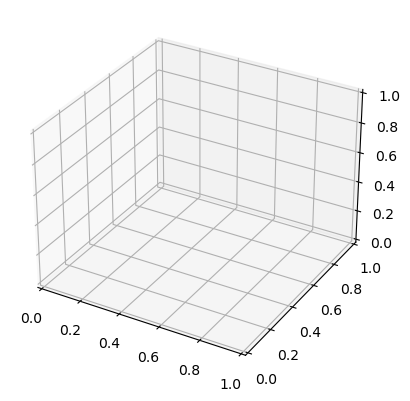

In [25]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled , )
ax.set_aspect('equal')

plt.show()

ValueError: When multidimensional, facecolors must match the shape of filled

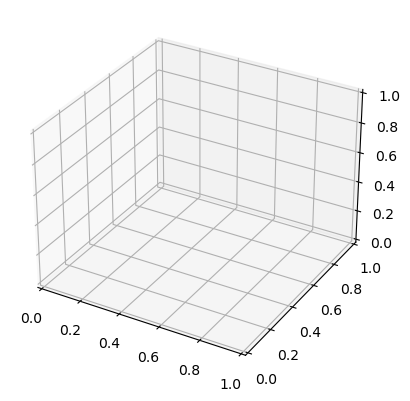

In [10]:
# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.set_aspect('equal')

plt.show()